# Problem Set 1 - Neural Network Implementation

As described in section "3 Neural network implementation" of assignment 1, the goal is to build a Feed-forward Neural Network for classification using different approaches. To validate that your code is working and that the network is actually learning something, you can use the MNIST dataset. Finally, please submit proof of the learning progress as described in the assignment.

- Team B 
- Maria Fernanda Ortega (225797)
- Luke Smith 

## Imports

In [42]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from network_scratch import NeuralNetwork
from network_pytorch import NeuralNetworkTorch
from network_tensorflow import NeuralNetworkTf, TimeBasedLearningRate
import utils
import torchvision as tv
import torch

tf.config.run_functions_eagerly(True)

In [43]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## A) Neural Network Classifier from Scratch

### Data


In [27]:
# Download MNIST dataset
x, y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# Preprocess dataset
x = (x / 255).astype('float32')
y = tf.keras.utils.to_categorical(y)

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)



### ML Model & Training

In [28]:
dnn = NeuralNetwork([x_train.shape[1], 2**7, 2**6, 10], learning_rate=1.5, epochs=50)
history = dnn.fit(x_train, y_train, x_val, y_val)

Epoch: 1, Training Time: 0.38s, Training Accuracy: 72.62%, Validation Accuracy: 66.50%
Epoch: 2, Training Time: 0.82s, Training Accuracy: 85.75%, Validation Accuracy: 80.50%
Epoch: 3, Training Time: 1.36s, Training Accuracy: 92.38%, Validation Accuracy: 84.00%
Epoch: 4, Training Time: 1.87s, Training Accuracy: 94.88%, Validation Accuracy: 84.50%
Epoch: 5, Training Time: 2.28s, Training Accuracy: 96.12%, Validation Accuracy: 85.00%
Epoch: 6, Training Time: 2.68s, Training Accuracy: 97.25%, Validation Accuracy: 85.50%
Epoch: 7, Training Time: 3.19s, Training Accuracy: 97.88%, Validation Accuracy: 87.50%
Epoch: 8, Training Time: 3.59s, Training Accuracy: 98.50%, Validation Accuracy: 89.00%
Epoch: 9, Training Time: 4.03s, Training Accuracy: 98.75%, Validation Accuracy: 90.00%
Epoch: 10, Training Time: 4.43s, Training Accuracy: 98.88%, Validation Accuracy: 90.50%
Epoch: 11, Training Time: 4.82s, Training Accuracy: 98.88%, Validation Accuracy: 90.50%
Epoch: 12, Training Time: 5.21s, Training

### Evaluation

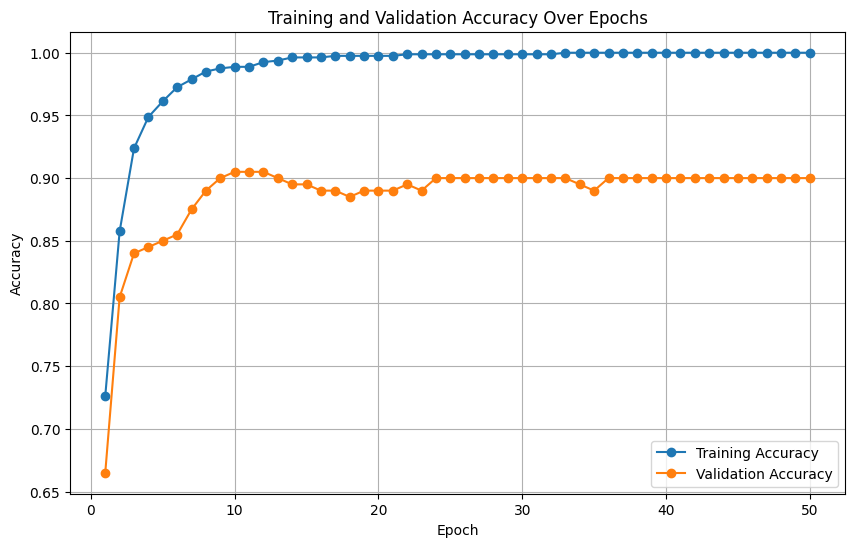

In [30]:
'''TODO: plot accuracy on train and validation set over epochs'''

import matplotlib.pyplot as plt


train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

# training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')

#labels and legend
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid()
plt.show()


## B) Neural Network Classifier using PyTorch

### Data

In [21]:
# Define data preprocessing steps
transform = tv.transforms.Compose([
                tv.transforms.ToTensor(),
                tv.transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = tv.datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = tv.datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)


### ML Model & Training

In [22]:
model = NeuralNetworkTorch(sizes=[784, 2**7, 2**6, 10], learning_rate=1.5, epochs=50, random_state=GLOBAL_RANDOM_STATE)
history_torch = model.fit(train_loader, val_loader)

Epoch: 1, Training Time: 2.11s, Learning Rate: 1.5, Training Accuracy: 55.30%, Validation Accuracy: 50.70%
Epoch: 2, Training Time: 4.16s, Learning Rate: 1.5, Training Accuracy: 58.20%, Validation Accuracy: 51.10%
Epoch: 3, Training Time: 6.79s, Learning Rate: 1.5, Training Accuracy: 54.10%, Validation Accuracy: 48.00%
Epoch: 4, Training Time: 9.67s, Learning Rate: 1.5, Training Accuracy: 67.40%, Validation Accuracy: 60.10%
Epoch: 5, Training Time: 12.36s, Learning Rate: 1.5, Training Accuracy: 65.90%, Validation Accuracy: 58.40%
Epoch: 6, Training Time: 15.01s, Learning Rate: 1.5, Training Accuracy: 67.90%, Validation Accuracy: 58.60%
Epoch: 7, Training Time: 17.83s, Learning Rate: 1.5, Training Accuracy: 65.10%, Validation Accuracy: 58.00%
Epoch: 8, Training Time: 20.60s, Learning Rate: 1.5, Training Accuracy: 70.80%, Validation Accuracy: 61.90%
Epoch: 9, Training Time: 23.40s, Learning Rate: 1.5, Training Accuracy: 65.30%, Validation Accuracy: 56.90%
Epoch: 10, Training Time: 26.11s

### Evaluation

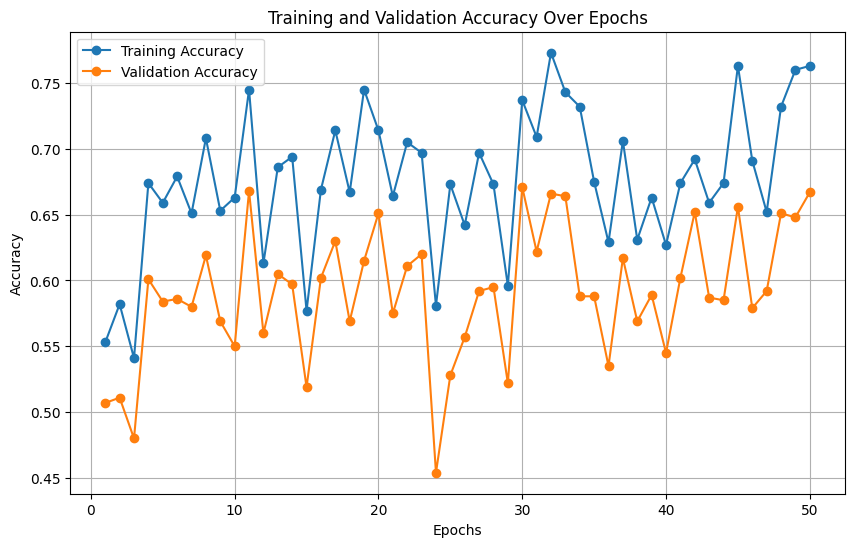

In [23]:
'''TODO: plot accuracy on train and validation set over epochs'''

import matplotlib.pyplot as plt


train_accuracy = history_torch['accuracy']
val_accuracy = history_torch['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

# training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', linestyle='-')

# labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


## C) Neural Network Classifier using Keras

### Data

In [44]:
# Download MNIST dataset
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

# Preprocess dataset
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)

# Use only small subset of data for faster training

x_train = x_train[:1000]
y_train = y_train[:1000]

x_val = x_val[:1000]
y_val = y_val[:1000]


### ML Model & Training

In [45]:
model_tf = NeuralNetworkTf(sizes=[784, 2**7, 2**5, 10])
tb_learning_rate = TimeBasedLearningRate(10)




In [46]:
history_tf = model_tf.compile_and_fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, learning_rate=tb_learning_rate, batch_size=1)

Epoch 1/50
1000/1000 [==============================] - 210s 210ms/step - loss: 23967175802880.0000 - accuracy: 0.0900 - val_loss: 3.0910 - val_accuracy: 0.0870
Epoch 2/50
1000/1000 [==============================] - 187s 187ms/step - loss: 3.1257 - accuracy: 0.0810 - val_loss: 3.6196 - val_accuracy: 0.0940
Epoch 3/50
1000/1000 [==============================] - 180s 180ms/step - loss: 3.0779 - accuracy: 0.0970 - val_loss: 4.1200 - val_accuracy: 0.1100
Epoch 4/50
1000/1000 [==============================] - 176s 176ms/step - loss: 3.1304 - accuracy: 0.0950 - val_loss: 2.9632 - val_accuracy: 0.0990
Epoch 5/50
1000/1000 [==============================] - 174s 174ms/step - loss: 3.1917 - accuracy: 0.0890 - val_loss: 3.2207 - val_accuracy: 0.0890
Epoch 6/50
1000/1000 [==============================] - 188s 188ms/step - loss: 3.1554 - accuracy: 0.0990 - val_loss: 2.9995 - val_accuracy: 0.0850
Epoch 7/50
1000/1000 [==============================] - 184s 184ms/step - loss: 3.1757 - accuracy: 

### Evaluation

In [ ]:
'''TODO: plot accuracy on train and validation set over epochs'''



# accuracy values from the training history
train_accuracy = history_tf.history['accuracy']
val_accuracy = history_tf.history['val_accuracy']


epochs = range(1, len(train_accuracy) + 1)

# training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()